In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import numpy as np
import seaborn as sb
%matplotlib inline
import time
from numba import jit

In [2]:
def lyapunov_fractal_sb(nmax, x_0 = .25, ra_start = 2, ra_end = 4, rb_start = 2 , rb_end = 4):

    start = time.time()
    
#     step_size = .01
    
#     ra = np.arange(ra_start, ra_end, step_size)
#     rb = np.arange(rb_start, rb_end, step_size)
    
    steps = 500
    
    ra = np.linspace(ra_start, ra_end, steps)
    rb = np.linspace(rb_start, rb_end, steps)
    
    r = np.meshgrid(ra, rb)
    print(len(r))
    
    x = [ [x_0 for a in range(len(ra))] for b in range(len(rb))]
    lya = np.zeros(len(ra))
    epsilon = .00000001

    
    for i in range(1000):
        if i % 2 == 0:
            x = np.multiply(x, ra) * np.subtract(1,x) # multiplies every column a value of ra
        else :
            x = np.multiply(x.T, rb).T * np.subtract(1,x) # multiples every row by a value of rb
    
    for i in range(nmax):
        
        if i % 2 == 0:
            x = np.multiply(x, ra) * np.subtract(1,x)
            lya = np.add(lya , np.log(np.add(np.abs(np.multiply(ra, (np.subtract(1, (np.multiply(2, x)))))), epsilon)))
            
        else:
            x = np.multiply(x.T, rb).T * np.subtract(1,x)
            lya = np.add(lya , np.log(np.add(np.abs(np.multiply(rb, (np.subtract(1, (np.multiply(2, x.T))))).T), epsilon)))
        
    print(len(lya))
    
    lya = np.divide(lya, nmax)
    
    ax = sb.heatmap(lya, robust=True, vmax = 0, square=True, cmap='flare')
    
    ax.invert_yaxis()
    
    xticks = np.arange(ra_start, ra_end, .2)
    yticks = np.arange(rb_start, rb_end, .2)
    
    # plt.xticks(xticks)
    # plt.yticks(yticks)
    
    end = time.time()

    print("This took", end - start, "seconds to execute")
    
    plt.show()

2
500
This took 4.412874221801758 seconds to execute


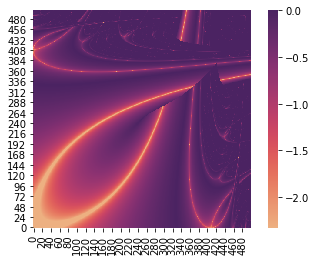

In [3]:
lyapunov_fractal_sb(200)

In [4]:
def lyapunov_fractal(nmax, ra_start = 2, ra_end = 4, rb_start = 2 , rb_end = 4, x_0 = 0.5, savepng = False, savetofile = False):

    start = time.time()
    
    n_warmups = 1200
    
#     step_size = .001
    
#     ra = np.arange(ra_start, ra_end, step_size)
#     rb = np.arange(rb_start, rb_end, step_size)

    steps = 500
    
    ra = np.linspace(ra_start, ra_end, steps)
    rb = np.linspace(rb_start, rb_end, steps)
    
#    r_b = 3
    
#     r = np.meshgrid(ra, rb)
#     print(len(r))
    
    x = [ [x_0 for a in range(len(ra))] for b in range(len(rb))]
    x = np.asarray(x)
    lya_grid = 0
    epsilon = 1e-20

    
    for i in range(n_warmups):
        if i % 2 == 0:
            x = np.multiply(x.T, ra).T * np.subtract(1,x)
        else :
            x = np.multiply(x, rb) * np.subtract(1,x)
    
    for i in range(nmax):
        
        if i % 2 == 0:
            x = np.multiply(x.T, ra).T * np.subtract(1,x)
#             lya_grid = np.add(lya_grid , np.log(np.add(np.abs(np.multiply(ra, (np.subtract(1, (np.multiply(2, x)))))), epsilon)))
            lya_grid = np.add(lya_grid , np.log(np.abs(np.multiply(ra, (np.subtract(1, (np.multiply(2, x))))))))
            
        else:
            x = np.multiply(x, rb) * np.subtract(1,x)
#             lya_grid = np.add(lya_grid , np.log(np.add(np.abs(np.multiply(rb, (np.subtract(1, (np.multiply(2, x.T))))).T), epsilon)))
            lya_grid = np.add(lya_grid , np.log(np.abs(np.multiply(rb, (np.subtract(1, (np.multiply(2, x.T))))).T)))
    
    lya_grid = np.divide(lya_grid, nmax)
    
    if savetofile:
        f = open("lyapunov_fractal.dat", "wb")
        lya_grid = np.ascontiguousarray(lya_grid)
        f.write(lya_grid)
        f.close()
    
#     lya_grid = -1 * lya_grid
    
    fig, ax = plt.subplots(figsize=(10, 9))
    
    fig.patch.set_facecolor('white')
    
#     lya_cmap = copy.copy(mpl.cm.get_cmap('viridis'))
    lya_cmap = copy.copy(mpl.cm.get_cmap('jet'))
    lya_cmap.set_over('black')
    
    lya_cmap.set_bad('black')
    
    
    
    plt.imshow(lya_grid , cmap = lya_cmap, vmax=0, origin = 'lower') # , norm=mpl.colors.LogNorm(vmin= 1e-4 , vmax=5))
    
    plt.colorbar()
    plt.suptitle("Lyapunov Logistic Fractal")
    plt.title("n = " + str(nmax))  
    
 #   plt.
    
    xticks = np.arange(ra_start, ra_end, .2)
    yticks = np.arange(rb_start, rb_end, .2)
    
    plt.xlabel("A")  
    plt.ylabel("B") 
    
    plt.xticks([])
    plt.yticks([])
    
    if(savepng):
        plt.savefig("heatmap_eb.png")
    
    plt.show()
    
    end = time.time()

    print("This took", end - start, "seconds to execute")
    

<ipython-input-4-5175015ce6ee>:39: RuntimeWarning: divide by zero encountered in log
  lya_grid = np.add(lya_grid , np.log(np.abs(np.multiply(ra, (np.subtract(1, (np.multiply(2, x))))))))
<ipython-input-4-5175015ce6ee>:44: RuntimeWarning: divide by zero encountered in log
  lya_grid = np.add(lya_grid , np.log(np.abs(np.multiply(rb, (np.subtract(1, (np.multiply(2, x.T))))).T)))


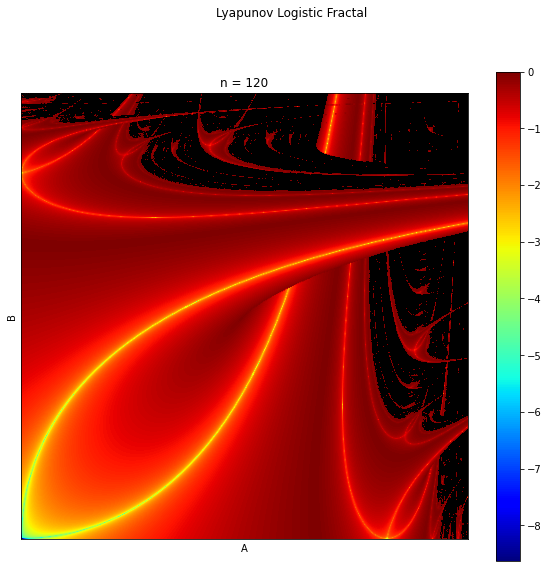

This took 4.247469425201416 seconds to execute


In [5]:
lyapunov_fractal(120 , savetofile = False)